In [247]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import chi2_contingency

In [248]:
df = pd.read_csv(r"C:\Users\jbbal\Downloads\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
df.shape

(891, 12)

In [250]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [252]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [253]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [254]:
df.loc[df.duplicated()] #No duplicated rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [255]:
df.loc[df.duplicated(subset = 'Name')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [256]:
df.loc[df.duplicated(subset = 'Ticket')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [257]:
df = df[[#'PassengerId', 
    'Survived', 'Pclass', #'Name',
         'Sex', 'Age', 
         #'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 
         'Embarked']]
df.shape

(891, 5)

In [258]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [259]:
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


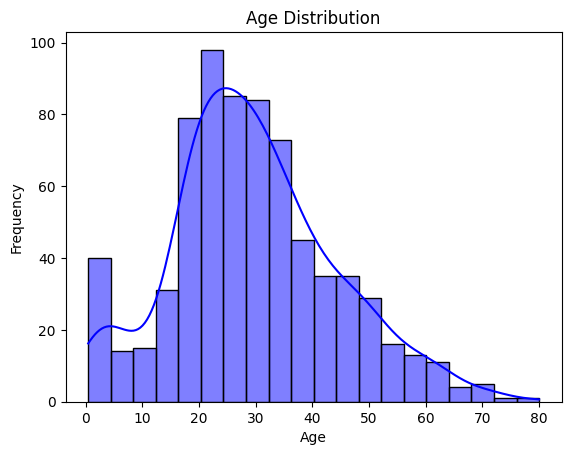

In [260]:
sns.histplot(df['Age'], bins = 20, kde = True, color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [261]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
#opt for median imputation because of the relatively high standard deviation

In [262]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
dtype: int64

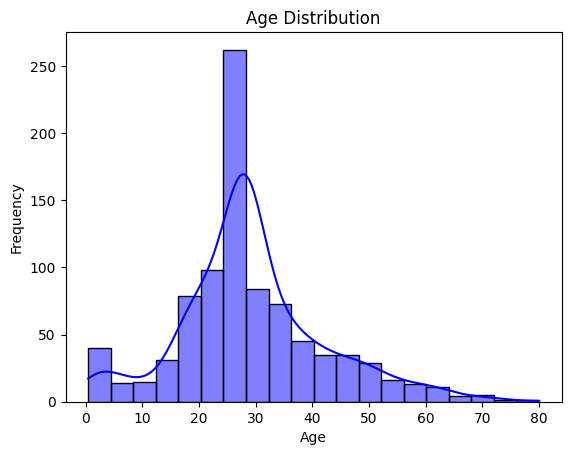

In [263]:
sns.histplot(df['Age'], bins = 20, kde = True, color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [264]:
mode_embarked = df['Embarked'].mode().iloc[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked) #opt for mode imputation as we are dealing with a categorical variable

In [265]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [266]:
df[df.isnull().any(axis = 1)]

,Survived,Pclass,Sex,Age,Embarked


In [267]:
df.isnull().any(axis = 1)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [268]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Embarked     object
dtype: object

In [269]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [270]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [271]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [272]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


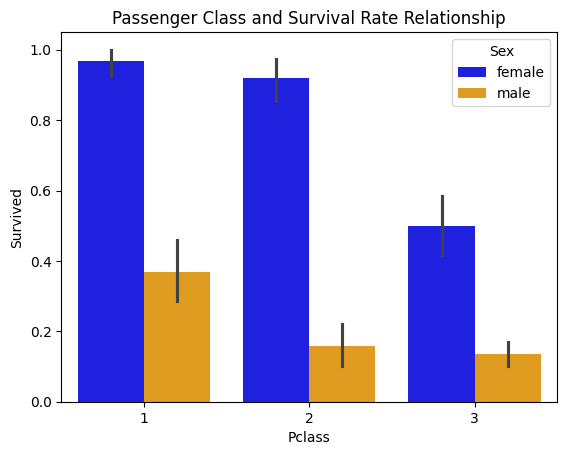

In [273]:
#Visualize each variable's relationship with the Survived column
custom = {'female': 'blue', 'male': 'orange'}
sns.barplot(x = 'Pclass', y = 'Survived', data = df, hue = 'Sex', palette = custom)
plt.title('Passenger Class and Survival Rate Relationship')
plt.show()

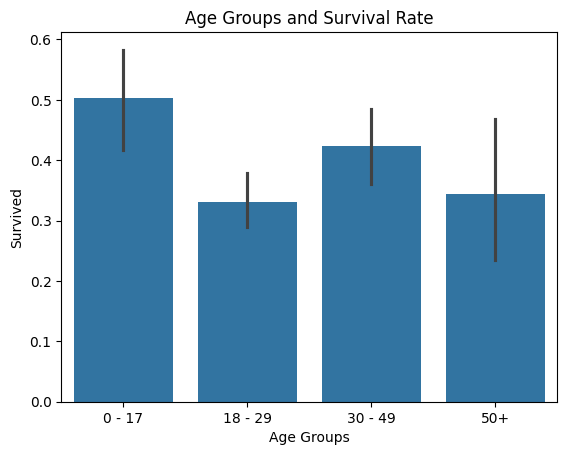

In [274]:
df['Age Groups'] = pd.cut(df['Age'], bins = [0, 18, 30, 50, df['Age'].max()], labels = ['0 - 17', '18 - 29', '30 - 49', '50+'])
sns.barplot(x = 'Age Groups', y = 'Survived', data = df)
plt.title('Age Groups and Survival Rate')
plt.show()

In [275]:
df = df.drop(columns = ['Age Groups'])
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [276]:
df['New_Survived'] = pd.cut(df['Survived'], bins = [-1, 0.5, 1], labels = ['No', 'Yes'])
df['New_Survived']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
886     No
887    Yes
888     No
889    Yes
890     No
Name: New_Survived, Length: 891, dtype: category
Categories (2, object): ['No' < 'Yes']

In [277]:
df['New_Survived'].value_counts()

New_Survived
No     549
Yes    342
Name: count, dtype: int64

In [278]:
df['PClass'] = pd.cut(df['Pclass'], bins = [-1, 1.5, 2.5, 3], labels = ['Upper', 'Middle', 'Lower'])

In [279]:
df['PClass'].value_counts()

PClass
Lower     491
Upper     216
Middle    184
Name: count, dtype: int64

In [280]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [281]:
df_chi = pd.crosstab(df['PClass'], df['New_Survived'])
df_chi

New_Survived,No,Yes
PClass,,
Upper,80,136
Middle,97,87
Lower,372,119


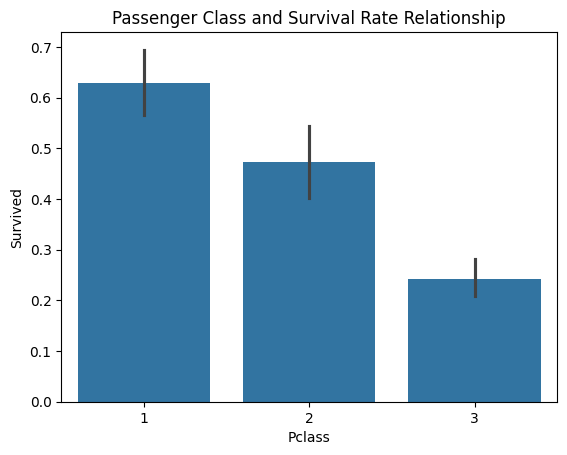

In [282]:
#Visualize each variable's relationship with the Survived column
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.title('Passenger Class and Survival Rate Relationship')
plt.show()

The chi-square test is a statistical method used to determine if there is a significant association between two categorical variables.

Null Hypothesis (H_0): We assume that there is no association between the categorical variables passenger class and the survivors, 
implying that any observed differences are due to random chance. This is true if p_value > alpha, where alpha = 0.05 (significance level), 
or the critical value for the chi-squared distribution to achieve the specified area 0.05 in the right tail for n degrees of freedom (which we will find) is greater than our calculated statistic.

Alternate Hypothesis (H_a): We assume that there is a significant association between the categorical variables passenger class and the survivors, 
indicating that the observed differences are not due to chance alone. This is true if p_value < alpha, where alpha = 0.05 (significance level), 
or the critical value for the chi-squared distribution to achieve the specified area 0.05 in the right tail for n degrees of freedom (which we will find) is less than our calculated statistic.

In [285]:
chi_matrix = chi2_contingency(df_chi)
chi_matrix

Chi2ContingencyResult(statistic=np.float64(102.88898875696056), pvalue=np.float64(4.549251711298793e-23), dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

The critical value for the chi-squared distribution to achieve the specified area 0.05 in the right tail for 2 degrees of freedom is 5.991.

In [289]:
chi_stat, p_value, dof, freq = chi_matrix
alpha = 0.05
critical_value = 5.991
if alpha < p_value and chi_stat < critical_value:
    print('We fail to reject the null hypothesis, thus we can conclude with 95% confidence that, the variables are independent.')
elif alpha > p_value and chi_stat > critical_value:
    print('We reject the null hypothesis, thus we can conclude with 95% confidence that, the variables have a strong correlation.')
    #we could have used either method, comparing alpha and the p value, or using the critical
    #value and calculated statistic, either or is sufficient alone.

We reject the null hypothesis, thus we can conclude with 95% confidence that, the variables have a strong correlation.
